In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import torch.nn.functional as F
from torch import Tensor

In [3]:
def sum_pooling(input, kernel_size):
    batch_size, channels, height, width = input.size()
    
    unfolded = F.unfold(input, kernel_size=kernel_size, stride=kernel_size)
    
    summed = unfolded.view(batch_size, channels, kernel_size * kernel_size, -1).sum(dim=2)
    
    output = summed.view(batch_size, channels, height // kernel_size, width // kernel_size)
    
    return output


# **Gluons ECAL Channel**

In [3]:
n_samples = 100000
batch_size = 10000
n_batches = int(n_samples/batch_size)
sumpool_jets_ECAL_gluon = np.empty((0, 8, 8))

for i in range(10):
    with h5py.File("/home/reyguadarrama/GSoC/data/quark-gluon_test-set_n139306.hdf5", 'r') as file:
        jets = file.get('X_jets')[batch_size*i:batch_size*(i+1)][:,:,:,1]
        label = file.get('y')[batch_size*i:batch_size*(i+1)]

        indices_gluon = np.where(label == 0)[0]
        jets_ECAL_gluon = jets[indices_gluon]
        cropped_jets_ECAL_gluon = jets_ECAL_gluon[:,22:102, 22:102]

        sumpool_jets_ECAL_gluon_batch = sum_pooling(Tensor(cropped_jets_ECAL_gluon).unsqueeze(1), kernel_size=10).squeeze(1).numpy()
        sumpool_jets_ECAL_gluon = np.concatenate((sumpool_jets_ECAL_gluon, sumpool_jets_ECAL_gluon_batch))
  

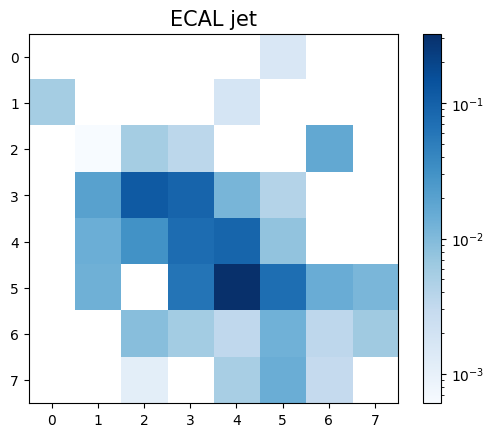

In [5]:
plt.imshow(sumpool_jets_ECAL_gluon[0], cmap="Blues", norm=mcolors.LogNorm())
plt.title("ECAL jet", fontsize=15)
plt.colorbar()
plt.show()

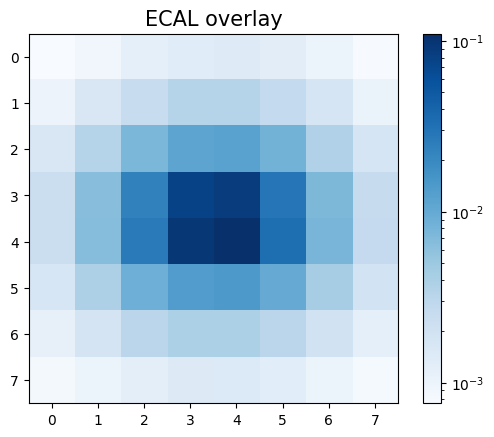

In [12]:
images_sumpool_jets_ECAL_gluon = np.mean(sumpool_jets_ECAL_gluon, axis=0)

plt.imshow(images_sumpool_jets_ECAL_gluon, cmap="Blues", norm=mcolors.LogNorm())
plt.title("ECAL overlay", fontsize=15)
plt.colorbar()
plt.show()

In [6]:
with h5py.File('../../data/gluon_data/gluon_ECAL_sumpool_8x8.h5', 'w') as file:
    file.create_dataset('gluon_ECAL_sumpool_8x8', data=sumpool_jets_ECAL_gluon)

# **Gluons HCAL Channel**

In [4]:
n_samples = 100000
batch_size = 10000
n_batches = int(n_samples/batch_size)
sumpool_jets_HCAL_gluon = np.empty((0, 8, 8))

for i in range(10):
    with h5py.File("/home/reyguadarrama/GSoC/data/quark-gluon_test-set_n139306.hdf5", 'r') as file:
        jets = file.get('X_jets')[batch_size*i:batch_size*(i+1)][:,:,:,2]
        label = file.get('y')[batch_size*i:batch_size*(i+1)]

        indices_gluon = np.where(label == 0)[0]
        jets_HCAL_gluon = jets[indices_gluon]
        cropped_jets_HCAL_gluon = jets_HCAL_gluon[:,22:102, 22:102]

        sumpool_jets_HCAL_gluon_batch = sum_pooling(Tensor(cropped_jets_HCAL_gluon).unsqueeze(1), kernel_size=10).squeeze(1).numpy()
        sumpool_jets_HCAL_gluon = np.concatenate((sumpool_jets_HCAL_gluon, sumpool_jets_HCAL_gluon_batch))
  

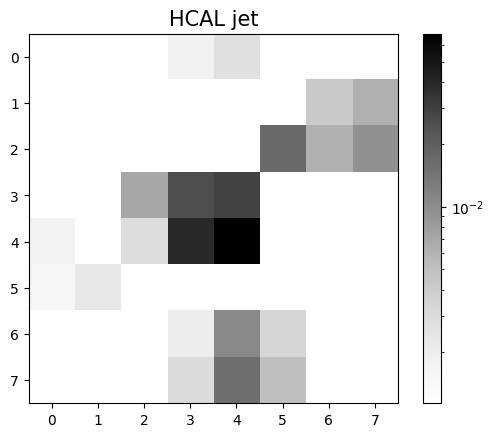

In [8]:
plt.imshow(sumpool_jets_HCAL_gluon[0], cmap="Grays", norm=mcolors.LogNorm())
plt.title("HCAL jet", fontsize=15)
plt.colorbar()
plt.show()

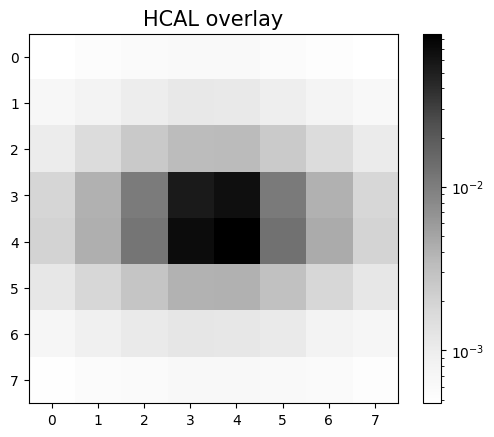

In [13]:
images_sumpool_jets_HCAL_gluon = np.mean(sumpool_jets_HCAL_gluon, axis=0)

plt.imshow(images_sumpool_jets_HCAL_gluon, cmap="Grays", norm=mcolors.LogNorm())
plt.title("HCAL overlay", fontsize=15)
plt.colorbar()
plt.show()

In [11]:
with h5py.File('../../data/gluon_data/gluon_HCAL_sumpool_8x8.h5', 'w') as file:
    file.create_dataset('gluon_HCAL_sumpool_8x8', data=sumpool_jets_HCAL_gluon)